Data Description:

    1) ID_Patient_Care_Situation: Care situation of a patient during treatment
    2) Diagnosed_Condition: The diagnosed condition of the patient
    3) ID_Patient: Patient identifier number
    4) Treatment_with_drugs: Class of drugs used during treatment
    4) Survived_1_year: If the patient survived after one year (0 means did not survive; 1 means survived)
    5) Patient_Age: Age of the patient
    6) Patient_Body_Mass_Index: A calculated value based on the patient’s weight, height, etc.
    7) Patient_Smoker: If the patient was a smoker or not
    8) Patient_Rural_Urban: If the patient stayed in Rural or Urban part of the country
    9) Previous_Condition: Condition of the patient before the start of the treatment ( This variable is splitted into 8 columns - A, B, C, D, E, F, Z and Number_of_prev_cond. A, B, C, D, E, F and Z are the previous conditions of the patient. Suppose for one patient, if the entry in column A is 1, it means that the previous condition of the patient was A. If the patient didn't have that condition, it is 0 and same for other conditions. If a patient has previous condition as A and C , columns A and C will have entries as 1 and 1 respectively while the other column B, D, E, F, Z will have entries 0, 0, 0, 0, 0 respectively. 
    10) The column Number_of_prev_cond will have entry as 2 i.e. 1 + 0 + 1 + 0 + 0 + 0 + 0 + 0 = 2 in this case. )
    11) Feel free to google 'Diagnose' and 'Body Mass Index' if you don't know about these terms.

# Evaluation Criteria
Submissions are evaluated based on the F1 Score calculated using the predicted value of your model and true value of of Survived_1_year on the unseen new test dataset mentioned under submission guidelines.

# Basic Steps That You May Follow
    
    1) The steps mentioned here are basic steps to get you started to solve the problem. You are free to use some techniques other than mentioned below to improve your model performance.

    2) Load the necessary libraries such as pandas, numpy, scikit-learn and more if any
    3) Load your dataset and perform exploratory data analysis to identify any patterns in the dataset
    4) You may fill mssing values if any (use mode for categorical column and mean/median for numerical columns). If there are no missing values, you may skip this step. Perform any other data preprocessing step that you think is required.
    5) Separate Input Variables and Target variable
    6) Split the dataset pharma_data into train set and test set. Now what is this pharma_data? - don't worry, just scroll up to dataset section above, we have declared the name of our dataset as pharma_data.
    7) Build a Model (You have to decide which model to use)
    8) Predict the target variable for your own test dataset created in step 5 and check the model performance.
    9) Not happy with your model performance? It is alright, you can try to optimise the model further to improve the performance of your model.

<p>Now, use your model on the test_new dataset mentioned in the "Submission Guidelines" section below. You need to predict whether a patient survived after 1 year of treatment (Survived_1_year == 1) or did not survive after 1 year of treatment (Survived_1_year == 0) based on the clinical and demographic features mentioned in the dataset.
Once you submit your predictions in prescribed format given under "Submission Guidelines" section, you will get a score based on your model performance.<p>

Want to improve your score? Optimise your model, generate new predictions and submit them again.
Submission Guidelines

Load the new unseen test data (name it as 'test_new'). You can load the data using the below command.
test_new = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Testing_set_begs.csv')
Here the Survived_1_year column is deliberately not there as you need to predict it.

With the model you have built from the earlier section, predict the target variable Survived_1_year on the new unseen test data that you loaded in step 1. Store the predicted values in a variable Survived_1_year

Save prediction result using the guidelines given under "how to save prediction file?" section.

Submission: Go to solve tab and submit your predicted values for Survived_1_year variable. The predicted values for Survived_1_year must be put in comma separated inside the square brackets of the following command prediction = []. Once done, click on 'run' button to get your result. Further, if you want to get your rank, click on the small submission icon which is in the form of tick mark. Follow the detailed instructional video uploaded earlier here: https://www.youtube.com/watch?v=XC3ZxHq5s9I.

How to save prediction file?
Please follow the steps given here: https://colab.research.google.com/drive/1E5hL-J0-SaFkSHpsmB1UaIbCyned0yu0?usp=sharing#scrollTo=GvSTtB9QOYB-

Help links to make submission
For getting comma-separated values, use: https://delim.co/
Sample video to make a submission: https://www.youtube.com/watch?v=XC3ZxHq5s9I
  

 


In [1]:
import pandas as pd
pharma_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_begs.csv')
pharma_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


In [2]:
pharma_data.shape

(23097, 18)

In [3]:
pharma_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 18 columns):
ID_Patient_Care_Situation    23097 non-null int64
Diagnosed_Condition          23097 non-null int64
Patient_ID                   23097 non-null int64
Treated_with_drugs           23084 non-null object
Patient_Age                  23097 non-null int64
Patient_Body_Mass_Index      23097 non-null float64
Patient_Smoker               23097 non-null object
Patient_Rural_Urban          23097 non-null object
Patient_mental_condition     23097 non-null object
A                            21862 non-null float64
B                            21862 non-null float64
C                            21862 non-null float64
D                            21862 non-null float64
E                            21862 non-null float64
F                            21862 non-null float64
Z                            21862 non-null float64
Number_of_prev_cond          21862 non-null float64
Survived_1_year    

In [4]:
pharma_data.describe()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
count,23097.000000,23097.000000,23097.000000,23097.000000,23097.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,23097.000000
mean,16545.712041,26.413127,6261.280772,33.209768,23.454820,0.897905,0.136355,0.185070,0.083615,0.393239,0.053700,0.000595,1.750480,0.632247
std,9532.263503,15.030865,3595.990620,19.549882,3.807661,0.302780,0.343173,0.388363,0.276817,0.488480,0.225431,0.024379,0.770311,0.482204
min,2.000000,0.000000,1.000000,0.000000,1.089300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,8280.000000,13.000000,3181.000000,16.000000,20.205550,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,16597.000000,26.000000,6242.000000,33.000000,23.386199,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
75%,24825.000000,39.000000,9363.000000,50.000000,26.788154,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000
max,33014.000000,52.000000,12515.000000,149.000000,29.999579,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000


In [5]:
pharma_data['ID_Patient_Care_Situation'].nunique()

23097

In [6]:
pharma_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


In [7]:
pharma_data['Survived_1_year'].value_counts()/pharma_data['Survived_1_year'].count()

1    0.632247
0    0.367753
Name: Survived_1_year, dtype: float64

In [8]:
pharma_data.isnull().sum()

ID_Patient_Care_Situation       0
Diagnosed_Condition             0
Patient_ID                      0
Treated_with_drugs             13
Patient_Age                     0
Patient_Body_Mass_Index         0
Patient_Smoker                  0
Patient_Rural_Urban             0
Patient_mental_condition        0
A                            1235
B                            1235
C                            1235
D                            1235
E                            1235
F                            1235
Z                            1235
Number_of_prev_cond          1235
Survived_1_year                 0
dtype: int64

In [9]:
# first import data visualizations libraries
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

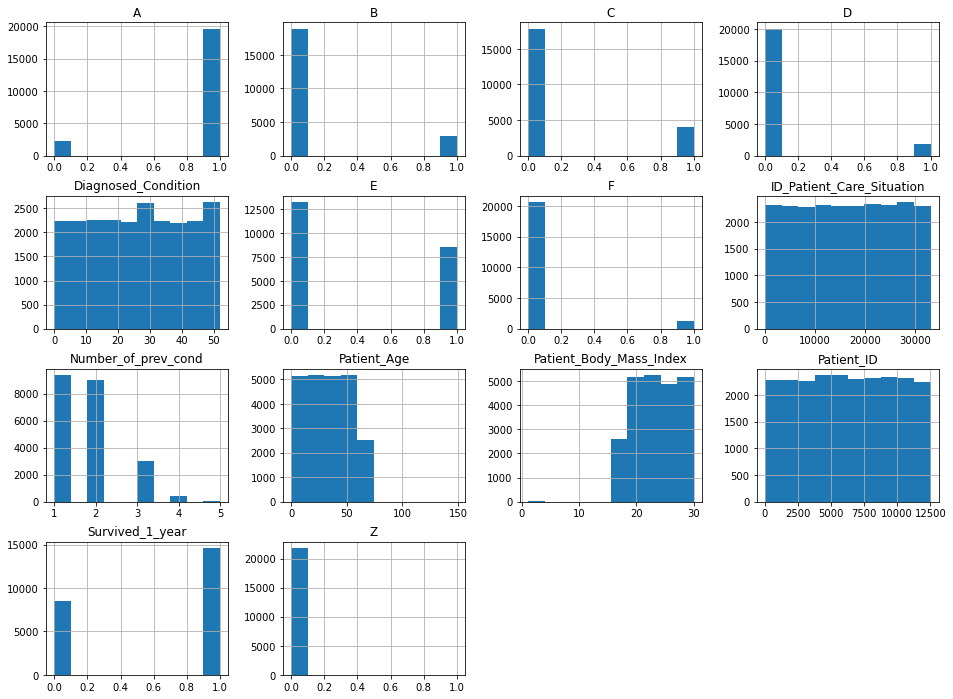

In [10]:
pharma_data.hist(bins=10, figsize=(16,12))
plt.show()

In [11]:
pharma_data.corr()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
ID_Patient_Care_Situation,1.000000,-0.007446,0.000235,0.000304,-0.007259,0.004557,0.005110,0.010724,-0.006509,0.000575,0.007779,0.042146,0.011111,-0.004685
Diagnosed_Condition,-0.007446,1.000000,0.008315,-0.008971,0.008305,0.004940,0.003936,-0.002826,-0.007843,0.007902,0.005931,-0.042806,0.004844,-0.004450
Patient_ID,0.000235,0.008315,1.000000,0.014015,-0.023189,-0.005371,-0.012235,-0.006363,-0.004678,0.000746,0.007838,0.042348,-0.008344,-0.004214
Patient_Age,0.000304,-0.008971,0.014015,1.000000,-0.006560,-0.027559,-0.013554,-0.012989,0.003471,-0.004523,0.006697,0.117190,-0.019371,-0.074934
Patient_Body_Mass_Index,-0.007259,0.008305,-0.023189,-0.006560,1.000000,0.019681,0.002384,-0.016850,-0.008383,-0.003661,-0.015598,-0.140303,-0.014036,-0.121844
A,0.004557,0.004940,-0.005371,-0.027559,0.019681,1.000000,-0.063683,-0.089832,-0.076064,-0.163082,-0.054378,-0.072338,0.170448,-0.049886
B,0.005110,0.003936,-0.012235,-0.013554,0.002384,-0.063683,1.000000,-0.021175,-0.002050,-0.017804,-0.016013,-0.009692,0.392773,-0.049805
C,0.010724,-0.002826,-0.006363,-0.012989,-0.016850,-0.089832,-0.021175,1.000000,0.007528,-0.026294,0.000903,-0.011624,0.445349,-0.033356
D,-0.006509,-0.007843,-0.004678,0.003471,-0.008383,-0.076064,-0.002050,0.007528,1.000000,-0.013478,-0.009650,-0.007368,0.320736,-0.105710
E,0.000575,0.007902,0.000746,-0.004523,-0.003661,-0.163082,-0.017804,-0.026294,-0.013478,1.000000,-0.005260,-0.019637,0.541840,0.021527


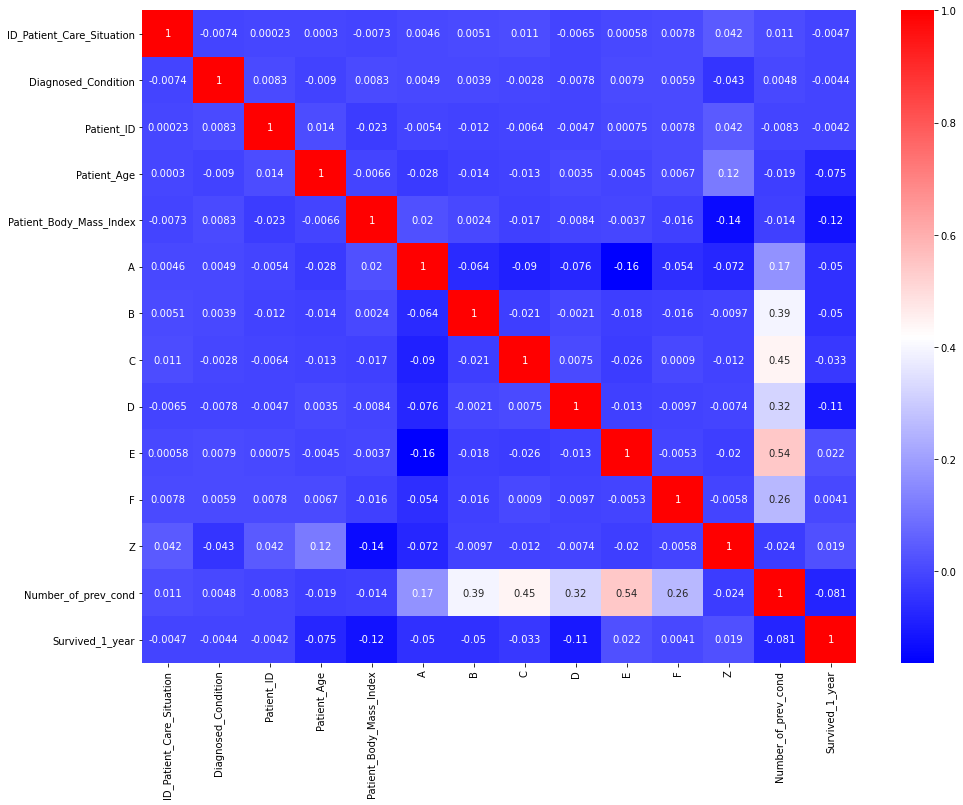

In [12]:
plt.figure(figsize=(16, 12))
sns.heatmap(pharma_data.corr(), cmap='bwr', annot=True)     # annot = True: to display the correlation value in the graph

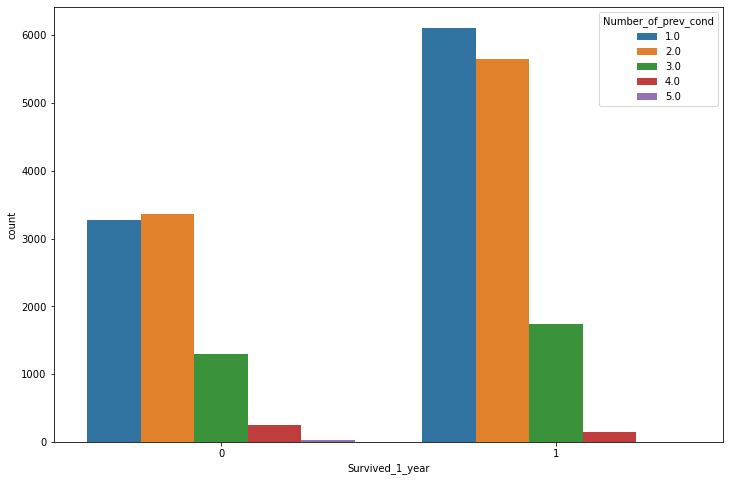

In [13]:
# Checking conditions of Patients before disease
plt.figure(figsize=(12,8))
sns.countplot(pharma_data.Survived_1_year, hue=pharma_data.Number_of_prev_cond)

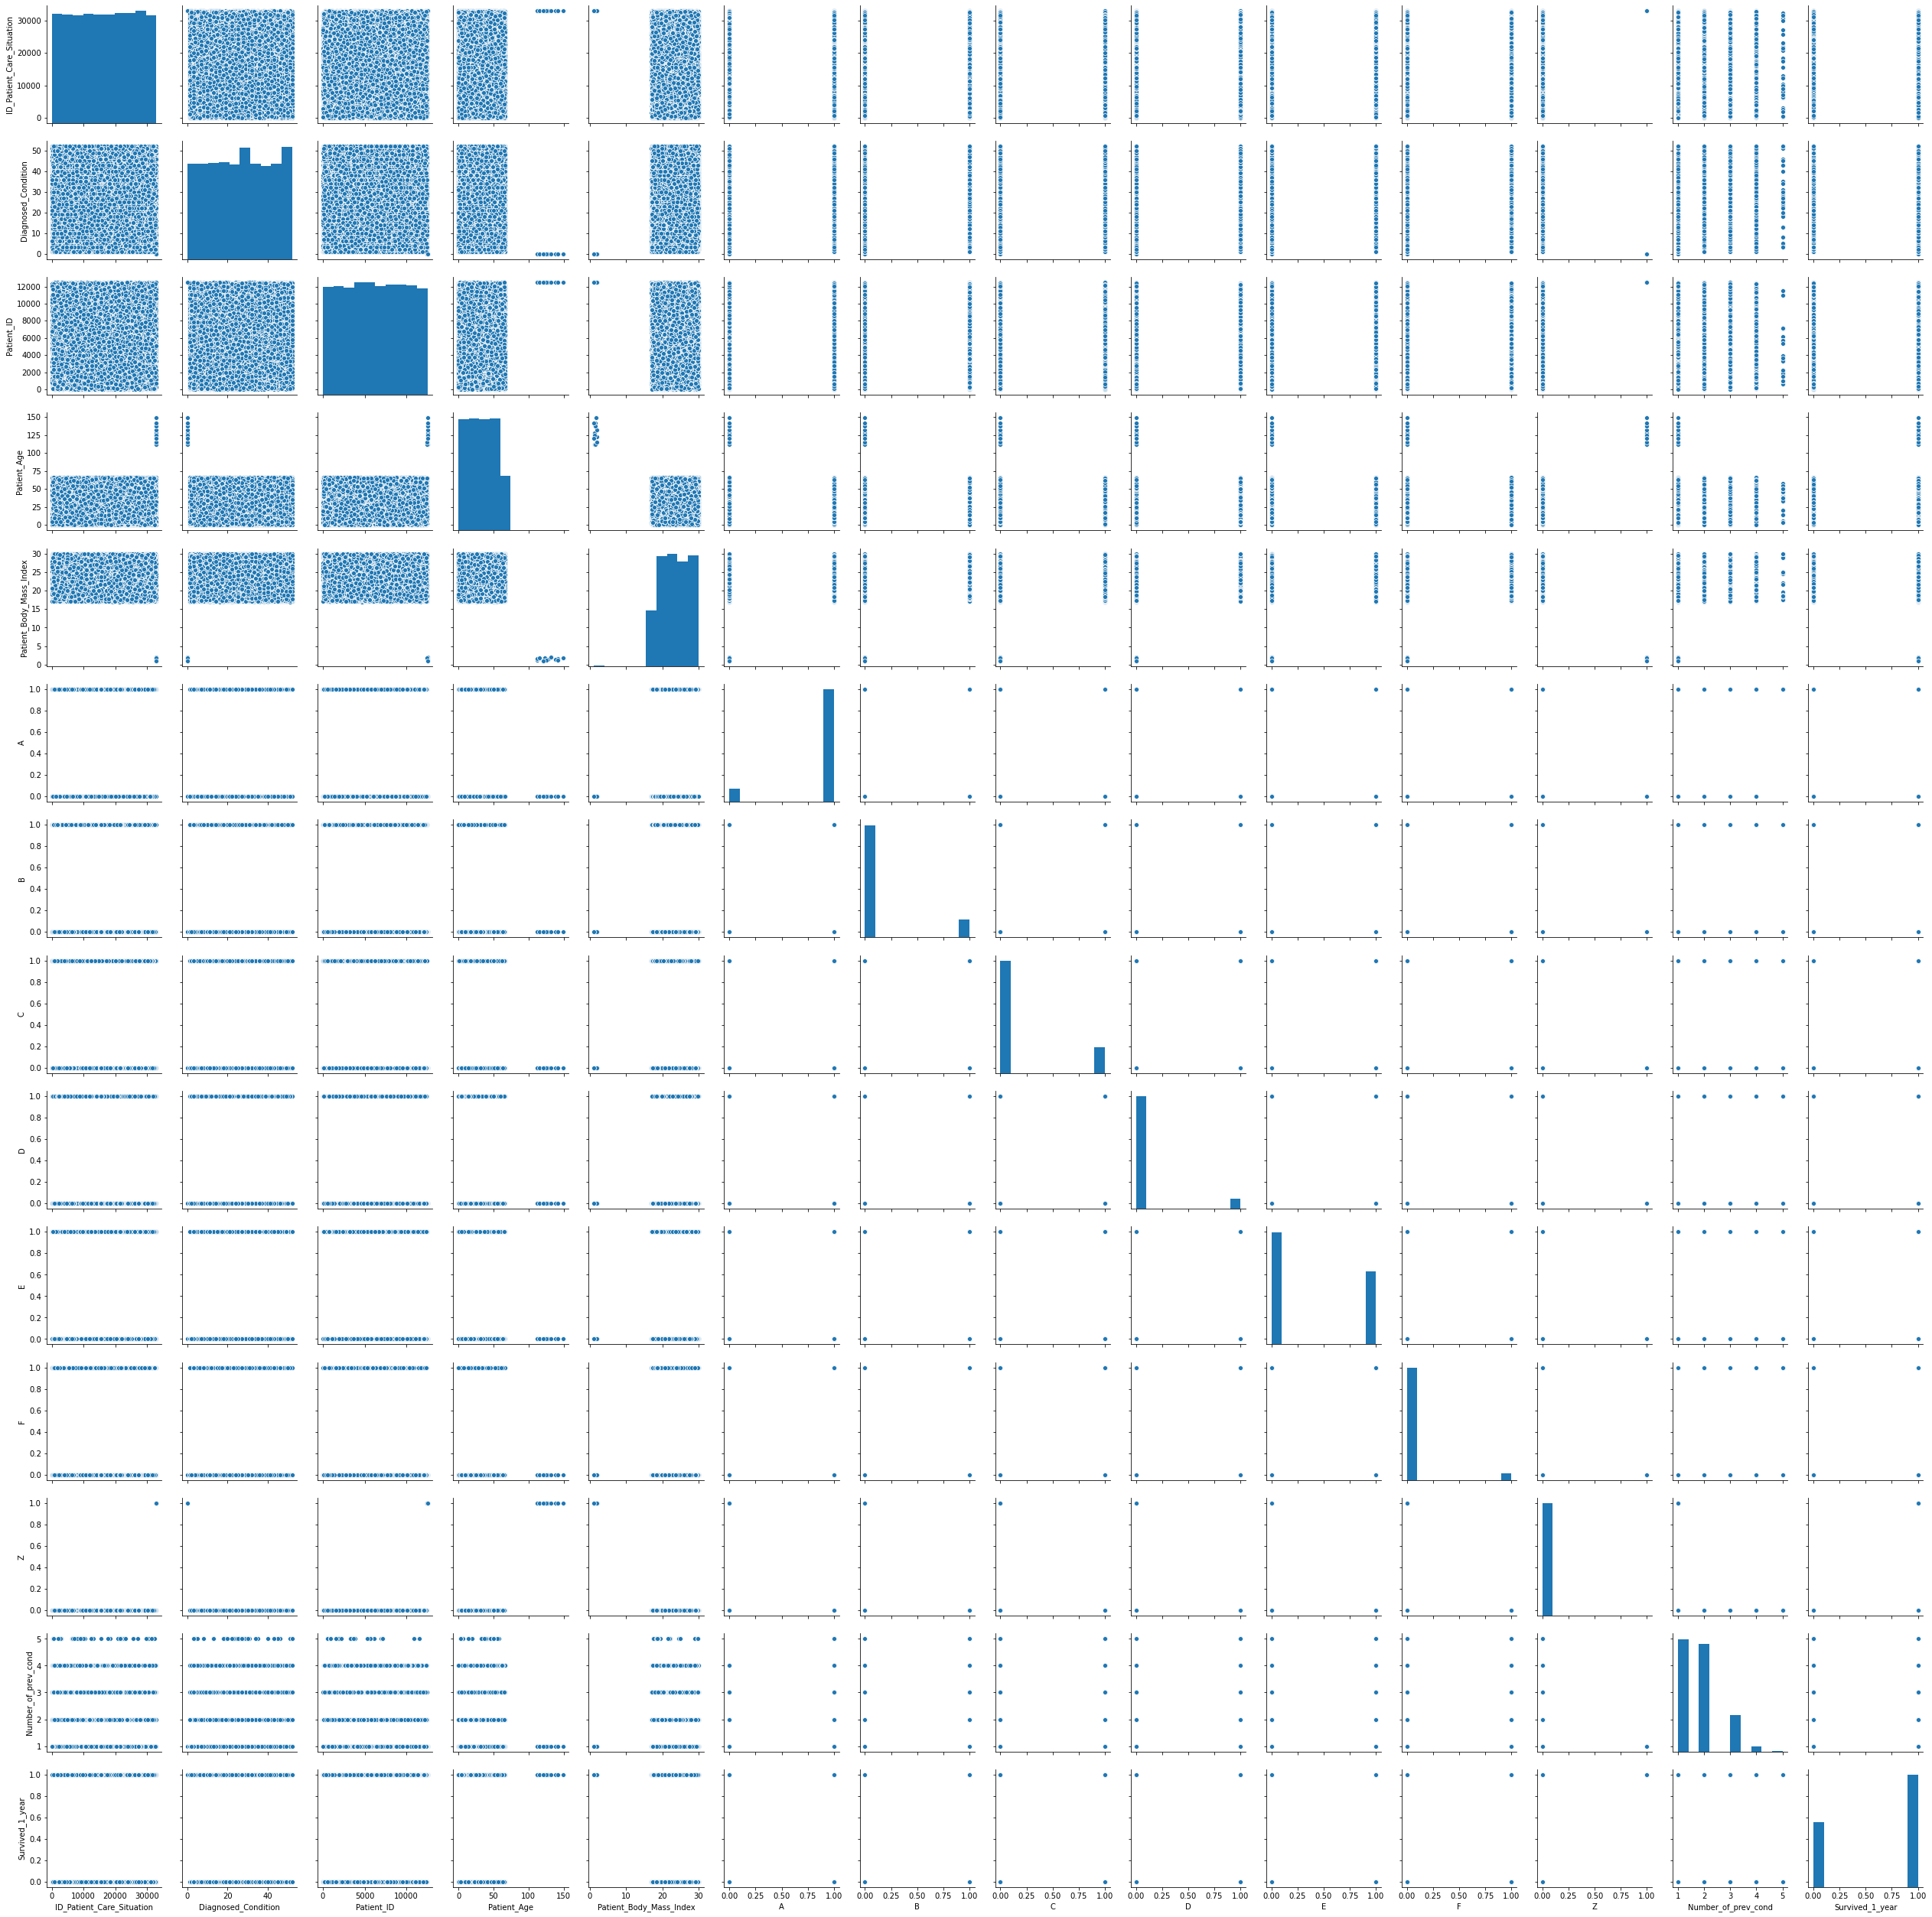

In [14]:
sns.pairplot(pharma_data)

# Data Preparation

In [15]:
pharma_data.Treated_with_drugs.value_counts()

DX6                     8606
DX5                     1909
DX2                     1904
DX1                     1835
DX3                     1830
DX4                     1792
DX3 DX4                  448
DX1 DX2                  448
DX1 DX3                  424
DX4 DX5                  423
DX2 DX4                  419
DX1 DX4                  408
DX3 DX5                  407
DX1 DX5                  402
DX2 DX5                  400
DX2 DX3                  398
DX1 DX2 DX5              103
DX1 DX3 DX5              101
DX1 DX2 DX4               99
DX3 DX4 DX5               96
DX1 DX2 DX3               95
DX2 DX3 DX5               91
DX1 DX3 DX4               90
DX2 DX3 DX4               87
DX2 DX4 DX5               84
DX1 DX4 DX5               80
DX1 DX3 DX4 DX5           24
DX1 DX2 DX3 DX4           24
DX2 DX3 DX4 DX5           22
DX1 DX2 DX4 DX5           18
DX1 DX2 DX3 DX5           14
DX1 DX2 DX3 DX4 DX5        3
Name: Treated_with_drugs, dtype: int64

In [18]:
pharma_data.Treated_with_drugs.unique()

array(['DX6', 'DX2 ', 'DX1 ', nan, 'DX3 ', 'DX5 ', 'DX4 ', 'DX2 DX5 ',
       'DX2 DX3 ', 'DX1 DX3 ', 'DX1 DX2 ', 'DX3 DX4 ', 'DX1 DX4 ',
       'DX1 DX5 ', 'DX2 DX4 DX5 ', 'DX1 DX2 DX3 ', 'DX3 DX5 ', 'DX2 DX4 ',
       'DX3 DX4 DX5 ', 'DX2 DX3 DX5 ', 'DX1 DX2 DX3 DX4 ', 'DX4 DX5 ',
       'DX2 DX3 DX4 ', 'DX1 DX4 DX5 ', 'DX1 DX2 DX4 ', 'DX1 DX3 DX5 ',
       'DX1 DX2 DX5 ', 'DX1 DX3 DX4 ', 'DX1 DX3 DX4 DX5 ',
       'DX1 DX2 DX4 DX5 ', 'DX2 DX3 DX4 DX5 ', 'DX1 DX2 DX3 DX5 ',
       'DX1 DX2 DX3 DX4 DX5 '], dtype=object)

Let's convert all the values in the column - 'Treated_with_drugs' to upper case

In [17]:
pharma_data['Treated_with_drugs'] = pharma_data['Treated_with_drugs'].str.upper()

In [19]:
pharma_data.Patient_Smoker.value_counts()

NO            13246
YES            9838
Cannot say       13
Name: Patient_Smoker, dtype: int64

There should be three category here - NO, YES, and Cannot say

In [21]:
def smoker(r):
    if (r == "NO") or (r == "NO "):
        return 'NO'
    elif (r == "YES") or (r == "YES ") or (r == "YESS") or (r == "YESS "):
        return 'YES'
    else:
        return 'Cannot say'

pharma_data.Patient_Smoker = pharma_data.Patient_Smoker.apply(smoker)  # Applying the function to all the entries of Patient_Smoker column

In [22]:
pharma_data.Patient_Rural_Urban.value_counts()

RURAL    16134
URBAN     6963
Name: Patient_Rural_Urban, dtype: int64

In [23]:
pharma_data.Patient_mental_condition.value_counts()

Stable    23097
Name: Patient_mental_condition, dtype: int64

There are no same value in different format in columns - 'Patient_Rural_Urban' and 'Patient_mental_condition'. So no data preparation required here. Now our dataset is good to go for EDA.

In [24]:
pharma_data.isnull().sum()

ID_Patient_Care_Situation       0
Diagnosed_Condition             0
Patient_ID                      0
Treated_with_drugs             13
Patient_Age                     0
Patient_Body_Mass_Index         0
Patient_Smoker                  0
Patient_Rural_Urban             0
Patient_mental_condition        0
A                            1235
B                            1235
C                            1235
D                            1235
E                            1235
F                            1235
Z                            1235
Number_of_prev_cond          1235
Survived_1_year                 0
dtype: int64

In [25]:
pharma_data['A'].fillna(pharma_data['A'].mode()[0], inplace = True)
pharma_data['B'].fillna(pharma_data['B'].mode()[0], inplace = True)
pharma_data['C'].fillna(pharma_data['C'].mode()[0], inplace = True)
pharma_data['D'].fillna(pharma_data['D'].mode()[0], inplace = True)
pharma_data['E'].fillna(pharma_data['E'].mode()[0], inplace = True)
pharma_data['F'].fillna(pharma_data['F'].mode()[0], inplace = True)
pharma_data['Z'].fillna(pharma_data['Z'].mode()[0], inplace = True)

In [26]:
pharma_data['Treated_with_drugs'].fillna(pharma_data['Treated_with_drugs'].mode()[0], inplace = True)

In [27]:
pharma_data['Number_of_prev_cond_1'] = pharma_data['A']+pharma_data['B']+pharma_data['C']+pharma_data['D']+pharma_data['E']+\
pharma_data['F']+pharma_data['Z']

In [28]:
pharma_data['Number_of_prev_cond_1'].min(), pharma_data['Number_of_prev_cond_1'].max()

(1.0, 5.0)

In [29]:
pharma_data['Number_of_prev_cond'].min(), pharma_data['Number_of_prev_cond'].max()

(1.0, 5.0)

In [30]:
pharma_data['Number_of_prev_cond'] = pharma_data['Number_of_prev_cond_1']
del pharma_data['Number_of_prev_cond_1']

In [31]:
pharma_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,DX6,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


In [32]:
pharma_data['Patient_mental_condition'].unique()

array(['Stable'], dtype=object)

In [33]:
drugs = pharma_data['Treated_with_drugs'].str.get_dummies(sep=' ') # split all the entries separated by space and create dummy variable
drugs.head()

,DX1,DX2,DX3,DX4,DX5,DX6
0,0,0,0,0,0,1
1,0,1,0,0,0,0
2,0,0,0,0,0,1
3,1,0,0,0,0,0
4,0,0,0,0,0,1


In [34]:
pharma_data = pd.concat([pharma_data, drugs], axis=1)     # concat the two dataframes 'drugs' and 'data'
pharma_data = pharma_data.drop('Treated_with_drugs', axis=1)    # dropping the column 'Treated_with_drugs' as its values are now splitted into different columns

pharma_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,...,F,Z,Number_of_prev_cond,Survived_1_year,DX1,DX2,DX3,DX4,DX5,DX6
0,22374,8,3333,56,18.479385,YES,URBAN,Stable,1.0,0.0,...,0.0,0.0,2.0,0,0,0,0,0,0,1
1,18164,5,5740,36,22.945566,YES,RURAL,Stable,1.0,0.0,...,0.0,0.0,1.0,1,0,1,0,0,0,0
2,6283,23,10446,48,27.510027,YES,RURAL,Stable,1.0,0.0,...,0.0,0.0,1.0,0,0,0,0,0,0,1
3,5339,51,12011,5,19.130976,NO,URBAN,Stable,1.0,0.0,...,0.0,0.0,1.0,1,1,0,0,0,0,0
4,33012,0,12513,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,...,0.0,1.0,1.0,1,0,0,0,0,0,1


In [35]:
pharma_data.Patient_Smoker[pharma_data['Patient_Smoker'] == "Cannot say"] = 'NO'    # we already know 'NO' is the mode so directly changing the values 'Cannot say' to 'NO'

The column 'Patient_mental_condition' has only one category 'stable'. So we can drop this column as for every observation the entry here is 'stable'. This feature won’t be useful for making the prediction of the target variable as it doesn’t provide any useful insights of the data. Hence, It is better to remove this kind of features.

In [36]:
pharma_data.drop('Patient_mental_condition', axis = 1, inplace=True)

Now let's convert the remaining categorical column to numerical using get_dummies() function of pandas (i.e. one hot encoding).

In [37]:
pharma_data = pd.get_dummies(pharma_data, columns=['Patient_Smoker', 'Patient_Rural_Urban'])

In [38]:
pharma_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,...,DX1,DX2,DX3,DX4,DX5,DX6,Patient_Smoker_NO,Patient_Smoker_YES,Patient_Rural_Urban_RURAL,Patient_Rural_Urban_URBAN
0,22374,8,3333,56,18.479385,1.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,1,0,1,0,1
1,18164,5,5740,36,22.945566,1.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,1,1,0
2,6283,23,10446,48,27.510027,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,1,1,0
3,5339,51,12011,5,19.130976,1.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,1,0,0,1
4,33012,0,12513,128,1.348400,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,1,0,1,0


In [39]:
pharma_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 24 columns):
ID_Patient_Care_Situation    23097 non-null int64
Diagnosed_Condition          23097 non-null int64
Patient_ID                   23097 non-null int64
Patient_Age                  23097 non-null int64
Patient_Body_Mass_Index      23097 non-null float64
A                            23097 non-null float64
B                            23097 non-null float64
C                            23097 non-null float64
D                            23097 non-null float64
E                            23097 non-null float64
F                            23097 non-null float64
Z                            23097 non-null float64
Number_of_prev_cond          23097 non-null float64
Survived_1_year              23097 non-null int64
DX1                          23097 non-null int64
DX2                          23097 non-null int64
DX3                          23097 non-null int64
DX4                    

As you can see there are no missing data now and all the data are of numerical type.

There are two ID columns - 'ID_Patient_Care_Situation' and 'Patient_ID'. We can think of removing these columns if these are randomly generated value and there is not any id repeated like we had done for the 'PassengerId' in Titanic Dataset. 'PassengerId' was randomly generated for each passenger and none of the ids were repeated. So let's check these two ids columns.

In [40]:
print(pharma_data.ID_Patient_Care_Situation.nunique())     # nunique() gives you the count of unique values in the column
print(pharma_data.Patient_ID.nunique())

23097
10570


You can see there are 23097 unique 'ID_Patient_Care_Situation' and there are 23097 total observations in the dataset. So this column can be dropped.

Now, there are only 10570 unique values in the column 'Patient_ID'. This means there are some patient who came two or more times in the hospital because it is possible the same person was sick for two or more than two times (with different illness) and visited hospital for the treatment. And the same patient will have different caring condition for different diseases. 

So there are some useful information in the column - 'Patient_ID' and thus we will not drop this column.

In [41]:
pharma_data.drop(['ID_Patient_Care_Situation'], axis =1, inplace=True)

### **Prepare Train/Test Data**

1. Separating the input and output variables

Before building any machine learning model, we always separate the input variables and output variables. Input variables are those quantities whose values are changed naturally in an experiment, whereas output variable is the one whose values are dependent on the input variables. So, input variables are also known as independent variables as its values are not dependent on any other quantity, and output variable/s are also known as dependent variables as its values are dependent on other variable i.e. input variables. Like here in this data, we can see that whether a person will survive after one year or not, depends on other variables like, age, diagnosis, body mass index, drugs used, etc.

By convention input variables are represented with 'X' and output variables are represented with 'y'.

In [42]:
X = pharma_data.drop('Survived_1_year',axis = 1)
y = pharma_data['Survived_1_year']

2. Train/test split

We want to check the performance of the model that we built. For this purpose, we always split (both input and output data) the given data into training set which will be used to train the model, and test set which will be used to check how accurately the model is predicting outcomes.

For this purpose we have a class called 'train_test_split' in the 'sklearn.model_selection' module.

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

### **Model Building**

We have seen from Exploratory Data Analysis that this is a classification problem as the target column 'Survived_1_year' has two values 0 - means the patient did not survive after one year of treatment, 1 - means the patient survived after one year of treatment. So we can use classification models for this problem. Some of the classification models are - Logistic Regression, Random Forest Classifier, Decision Tree Classifier, etc. However, we have used two of them - Logistic Regression and Random Forest Classifier.

### 1. Logistic Regression Model

In [44]:
from sklearn.linear_model import LogisticRegression     # Logistic regression model

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder    # for converting categorical to numerical

from sklearn.metrics import f1_score    # for model evaluation

In [45]:
model = LogisticRegression(max_iter = 1000)     # The maximum number of iterations will be 1000. This will help you prevent from convergence warning.
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
pred = model.predict(X_test)

*Evaluation:*

In [47]:
print(f1_score(y_test,pred))

0.7872443227572878


The f1 score by Logistic Regression model is 79%. Let's try Random Forest Classifier and see if we get better result with it.

### 2. Random Forest

In [48]:
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier

In [49]:
forest = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=5)
 
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

##### Evaluating on X_test

In [50]:
y_pred = forest.predict(X_test)

fscore = f1_score(y_test ,y_pred)
fscore

0.8341410035954353

The f1 score by Random Forest classifier is 84% which is better than logistic regression.

Well there are so many feaures to train the model. We can go and try some feature selection techniques and check if the performance of Random Forest is affected or not. And see if with the decrease in the complexity of model is satisfactory with minimal affect to the performance of the model.

We have used the Boruta feature selector. You can use some other techniques too and see if that is giving better result than Boruta.

### 3. Random Forest and Boruta

In [51]:
from boruta import BorutaPy

In [52]:
import numpy as np
boruta_selector = BorutaPy(forest, n_estimators='auto', verbose=2, random_state=1)   # initialize the boruta selector
boruta_selector.fit(np.array(X_train), np.array(y_train))       # fitting the boruta selector to get all relavent features. NOTE: BorutaPy accepts numpy arrays only.

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	16
Tentative: 	3
Rejected: 	3
Iteration: 	9 / 100
Confirmed: 	16
Tentative: 	3
Rejected: 	3
Iteration: 	10 / 100
Confirmed: 	16
Tentative: 	3
Rejected: 	3
Iteration: 	11 / 100
Confirmed: 	16
Tentative: 	3
Rejected: 	3
Iteration: 	12 / 100
Confirmed: 	16
Tentative: 	3
Rejected: 	3
Iteration: 	13 / 100
Confirmed: 	16
Tentative: 	3
Rejected: 	3
Iteration: 	14 / 100
Confirmed: 	16
Tentative: 	3
Rejected: 	3
Iteration: 	15 / 100
Confirmed: 	16
Tentative: 	3
Rejected: 	3
Iteration: 	16 / 100
Confirmed: 	16
Tentative: 	3
Rejected: 	3
I

BorutaPy(alpha=0.05,
         estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                          class_weight=None, criterion='gini',
                                          max_depth=5, max_features='auto',
                                          max_leaf_nodes=None, max_samples=None,
                                          min_impurity_decrease=0.0,
                                          min_impurity_split=None,
                                          min_samples_leaf=1,
                                          min_samples_split=2,
                                          min_weight_fraction_leaf=0.0,
                                          n_estimators=123, n_jobs=None,
                                          oob_score=False,
                                          random_state=<mtrand.RandomState object at 0x0000015D4C111B88>,
                                          verbose=0, warm_start=False),
         max_iter=100, n_es

In [53]:
print("Selected Features: ", boruta_selector.support_)    # check selected features
 

print("Ranking: ",boruta_selector.ranking_)               # check ranking of features

print("No. of significant features: ", boruta_selector.n_features_)

Selected Features:  [ True  True  True  True  True False False  True False False False  True
  True  True  True  True  True  True  True  True  True  True]
Ranking:  [1 1 1 1 1 2 3 1 4 5 6 1 1 1 1 1 1 1 1 1 1 1]
No. of significant features:  17


So boruta has selected 17 relavent features. # Let's visualise it better in the form of a table

#### Displaying features rank wise

In [54]:
selected_rfe_features = pd.DataFrame({'Feature':list(X_train.columns),
                                      'Ranking':boruta_selector.ranking_})
selected_rfe_features.sort_values(by='Ranking')

,Feature,Ranking
0,Diagnosed_Condition,1
19,Patient_Smoker_YES,1
18,Patient_Smoker_NO,1
17,DX6,1
16,DX5,1
15,DX4,1
14,DX3,1
13,DX2,1
12,DX1,1
11,Number_of_prev_cond,1


#### Create a new subset of the data with only the selected features

In [55]:
X_important_train = boruta_selector.transform(np.array(X_train))
X_important_test = boruta_selector.transform(np.array(X_test))

#### Build the model with selected features

In [56]:
# Create a new random forest classifier for the most important features
rf_important = RandomForestClassifier(random_state=1, n_estimators=1000, n_jobs = -1)

# Train the new classifier on the new dataset containing the most important features
rf_important.fit(X_important_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

#### Evaluation

In [57]:
y_important_pred = rf_important.predict(X_important_test)
rf_imp_fscore = f1_score(y_test, y_important_pred)

In [58]:
print(rf_imp_fscore)

0.8461019237259534


### Hyper Parameter Tunning

In [59]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [5, 10, 15],
    'n_estimators': [500, 1000]}

In [60]:
rf = RandomForestClassifier(random_state = 1)

# Grid search cv
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 2, n_jobs = -1, verbose = 2)

In [61]:
grid_search.fit(X_important_train, y_train)

Fitting 2 folds for each of 12 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  24 | elapsed:  1.1min remaining:    6.0s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  1.4min finished


GridSearchCV(cv=2, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=1,
                                   

In [62]:
grid_search.best_params_

{'bootstrap': True, 'max_depth': 15, 'n_estimators': 1000}

In [63]:
pred = grid_search.predict(X_important_test)

In [64]:
f1_score(y_test, pred)

0.854121201947289

# Conclusion
* It is clearly observable that how the f1 scores increased from logistic regression to random forest, random forest with full features to random forest on the selected features using Boruta. 
* Then again the f1 score increased with Hyper parameter tunning.
* Also this is one of the approach to solve this problem. There can be many other approaches to solve this problem.
* We could also try standardizing and normalizing the data or some other algorithms and so on....
* Well you should try standardizing or normalizing the data and then observe the difference in f1 score.
* Also try doing using Decision Tree.


**Now let's predict the output for new test data**

Well, we will predict the output for new test data using the Random Forest model with the selected features using Boruta and also with the best parameters that we got during hyper parmeter tunning because we have got the highest f1 score with this model on **X_test** data (also called the validation data). We can directly use **grid_search** variable to predict as this variable is the reference to the trained model.

## New Test Data
Tasks to be performed:
*  Load the new test data
*  Data Preparation - same as done on training data
*  If missing values are there then fill the missing values with the same techniques that were used for training dataset
*  Convert categorical column to numerical
*  Predict the output
*  Download the predicted values in csv

Why do we need to do the same procedure of filling missing values, data cleaning and data preprocessing on the new test data as it was done for the training and evaluation data?

**Ans:** Because our model has been trained on certain format of data and if we don't provide the testing data of the similar format, the model will give erroneous predictions and the accuracy/f1 score of the model will decrease. Also, if the model was build on 'n' number of features, while predicting on new test data you should always give the same number of features to the model. In this case if you provide different number of features while predicting the output, your ML model will throw a **ValueError** saying something like **'number of features given x; expecting n'**. Not confident about these statements? Well, as a data scientist you should always perform some experiment and observe the results.

In [65]:
# Load the data
test_new_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Testing_set_begs.csv')

In [66]:
# take a look how the new test data look like
test_new_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond
0,19150,40,3709,DX3,16,29.443894,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,23216,52,986,DX6,24,26.836321,NO,URBAN,Stable,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,11890,50,11821,DX4 DX5,63,25.523280,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
3,7149,32,3292,DX6,42,27.171155,NO,URBAN,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0
4,22845,20,9959,DX3,50,25.556192,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


**Can you observe the new test data here?** It is in the same format as our training data before performing any cleaning and preprocessing.

### Data Preparation - same as we did for training data

In [67]:
test_new_data.Treated_with_drugs.value_counts()

DX6                     3462
DX4                      785
DX5                      782
DX1                      753
DX3                      747
DX2                      745
DX2 DX4                  181
DX2 DX3                  179
DX1 DX5                  166
DX2 DX5                  165
DX3 DX5                  161
DX1 DX2                  160
DX4 DX5                  157
DX1 DX4                  153
DX1 DX3                  152
DX3 DX4                  148
DX1 DX2 DX5               41
DX1 DX3 DX4               41
DX3 DX4 DX5               40
DX1 DX2 DX3               40
DX2 DX3 DX4               40
DX1 DX2 DX4               38
DX2 DX3 DX5               37
DX1 DX4 DX5               34
DX2 DX4 DX5               33
DX1 DX3 DX5               23
DX1 DX3 DX4 DX5           11
DX2 DX3 DX4 DX5            8
DX1 DX2 DX4 DX5            8
DX1 DX2 DX3 DX5            6
DX1 DX2 DX3 DX4            5
DX1 DX2 DX3 DX4 DX5        2
Name: Treated_with_drugs, dtype: int64

Let's convert all the values in the column - 'Treated_with_drugs' to upper case

In [68]:
test_new_data['Treated_with_drugs'] = test_new_data['Treated_with_drugs'].str.upper()

In [69]:
test_new_data.Patient_Smoker.value_counts()

NO     5333
YES    3970
Name: Patient_Smoker, dtype: int64

There should be three category here - NO, YES, and Cannot say

In [70]:
def smoker(r):
    if (r == "NO") or (r == "NO "):
        return 'NO'
    elif (r == "YES") or (r == "YES ") or (r == "YESS") or (r == "YESS "):
        return 'YES'
    else:
        return 'Cannot say'

test_new_data.Patient_Smoker = test_new_data.Patient_Smoker.apply(smoker)

In [71]:
test_new_data.Patient_Rural_Urban.value_counts()

RURAL    6502
URBAN    2801
Name: Patient_Rural_Urban, dtype: int64

In [72]:
test_new_data.Patient_mental_condition.value_counts()

Stable    9303
Name: Patient_mental_condition, dtype: int64

### Checking missing values

In [73]:
test_new_data.isnull().sum()

ID_Patient_Care_Situation    0
Diagnosed_Condition          0
Patient_ID                   0
Treated_with_drugs           0
Patient_Age                  0
Patient_Body_Mass_Index      0
Patient_Smoker               0
Patient_Rural_Urban          0
Patient_mental_condition     0
A                            0
B                            0
C                            0
D                            0
E                            0
F                            0
Z                            0
Number_of_prev_cond          0
dtype: int64

New test data has no missing values. So treating missing value is not required.

#### Preprocessing and data cleaning: same as we did on training data

In [74]:
drugs = test_new_data['Treated_with_drugs'].str.get_dummies(sep=' ') # split all the entries
drugs.head()

,DX1,DX2,DX3,DX4,DX5,DX6
0,0,0,1,0,0,0
1,0,0,0,0,0,1
2,0,0,0,1,1,0
3,0,0,0,0,0,1
4,0,0,1,0,0,0


In [75]:
test_new_data = pd.concat([test_new_data, drugs], axis=1)     # concat the two dataframes 'drugs' and 'data'
test_new_data = test_new_data.drop('Treated_with_drugs', axis=1)    # dropping the column 'Treated_with_drugs' as its values are splitted into different columns

test_new_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,...,E,F,Z,Number_of_prev_cond,DX1,DX2,DX3,DX4,DX5,DX6
0,19150,40,3709,16,29.443894,NO,RURAL,Stable,1.0,0.0,...,1.0,0.0,0.0,2.0,0,0,1,0,0,0
1,23216,52,986,24,26.836321,NO,URBAN,Stable,1.0,1.0,...,0.0,0.0,0.0,2.0,0,0,0,0,0,1
2,11890,50,11821,63,25.523280,NO,RURAL,Stable,1.0,0.0,...,1.0,0.0,0.0,2.0,0,0,0,1,1,0
3,7149,32,3292,42,27.171155,NO,URBAN,Stable,1.0,0.0,...,1.0,0.0,0.0,3.0,0,0,0,0,0,1
4,22845,20,9959,50,25.556192,NO,RURAL,Stable,1.0,0.0,...,0.0,0.0,0.0,1.0,0,0,1,0,0,0


In [76]:
test_new_data.Patient_Smoker.value_counts()

NO     5333
YES    3970
Name: Patient_Smoker, dtype: int64

This data does not have value as 'Cannot say' in 'Patient_Smoker' column

The column 'Patient_mental_condition' has only one category 'stable'. So we can drop this column as for every observation the entry here is 'stable'.

In [77]:
test_new_data.drop('Patient_mental_condition', axis = 1, inplace=True)

Now let's convert the categorical column to numerical using get_dummies() function of pandas (i.e. one hot encoding).

In [78]:
test_new_data = pd.get_dummies(test_new_data, columns=['Patient_Smoker', 'Patient_Rural_Urban'])

In [79]:
test_new_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,...,DX1,DX2,DX3,DX4,DX5,DX6,Patient_Smoker_NO,Patient_Smoker_YES,Patient_Rural_Urban_RURAL,Patient_Rural_Urban_URBAN
0,19150,40,3709,16,29.443894,1.0,0.0,0.0,0.0,1.0,...,0,0,1,0,0,0,1,0,1,0
1,23216,52,986,24,26.836321,1.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,1,1,0,0,1
2,11890,50,11821,63,25.523280,1.0,0.0,0.0,0.0,1.0,...,0,0,0,1,1,0,1,0,1,0
3,7149,32,3292,42,27.171155,1.0,0.0,1.0,0.0,1.0,...,0,0,0,0,0,1,1,0,0,1
4,22845,20,9959,50,25.556192,1.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,1,0,1,0


In [80]:
test_new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9303 entries, 0 to 9302
Data columns (total 23 columns):
ID_Patient_Care_Situation    9303 non-null int64
Diagnosed_Condition          9303 non-null int64
Patient_ID                   9303 non-null int64
Patient_Age                  9303 non-null int64
Patient_Body_Mass_Index      9303 non-null float64
A                            9303 non-null float64
B                            9303 non-null float64
C                            9303 non-null float64
D                            9303 non-null float64
E                            9303 non-null float64
F                            9303 non-null float64
Z                            9303 non-null float64
Number_of_prev_cond          9303 non-null float64
DX1                          9303 non-null int64
DX2                          9303 non-null int64
DX3                          9303 non-null int64
DX4                          9303 non-null int64
DX5                          9303 non-null

As you can see there are no missing data now and all the data are of numerical type.

The column - 'ID_Patient_Care_Situation' is an ID. Here we can remove this column too as we did in training dataset.

In [81]:
test_new_data.drop(['ID_Patient_Care_Situation'], axis =1, inplace=True)

In [82]:
test_new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9303 entries, 0 to 9302
Data columns (total 22 columns):
Diagnosed_Condition          9303 non-null int64
Patient_ID                   9303 non-null int64
Patient_Age                  9303 non-null int64
Patient_Body_Mass_Index      9303 non-null float64
A                            9303 non-null float64
B                            9303 non-null float64
C                            9303 non-null float64
D                            9303 non-null float64
E                            9303 non-null float64
F                            9303 non-null float64
Z                            9303 non-null float64
Number_of_prev_cond          9303 non-null float64
DX1                          9303 non-null int64
DX2                          9303 non-null int64
DX3                          9303 non-null int64
DX4                          9303 non-null int64
DX5                          9303 non-null int64
DX6                          9303 non-null

### Prediction

In [83]:
imp_test_features = boruta_selector.transform(np.array(test_new_data))

In [84]:
prediction = grid_search.predict(imp_test_features)

We have the predicted output stored in the variable 'prediction'. Let's download this prediction as csv file as shown below.

In [111]:
res = pd.DataFrame(prediction)
res.index = test_new_data.index 
res.columns = ["prediction"]

res.to_csv("final_submission_predicted_values.csv", index=False)